In [1]:
from scipy.stats import median_absolute_deviation as MAD
import pandas as pd
from os.path import join
from ast import literal_eval

In [2]:
dirDatasets=join(r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\Euclid')
fileName=r'04_COSMOS2015_FullMagLim_SOMinfo.csv'
idCol='Seq'
specZ='specZ'
photoZ_ML='photoZ_ML'
photoZ_SED='photoZ_SED'
residML='resid_ML'
residSED='resid_SED'
residML_SED='residML_SED'
cellIDs={'train':'cellID_TrainSOM','run':'cellID_RunSOM','runBig':'cellID_RunBigSOM'}
quantErr='quantErr'

In [3]:
dataset=pd.read_csv(join(dirDatasets,fileName))
for cellID in cellIDs.values():
    dataset[cellID]=[literal_eval(x) for x in dataset[cellID]]
dataset=dataset.astype({'specZ_outlCoeff': 'float','photoZ_SED_outlCoeff': 'float','photoZ_ML_outlCoeff': 'float'})

C:\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
groups=dataset.groupby('cellID_RunSOM')
data=groups['photoZ_SED'].apply(len).rename('occupation_total')
data=pd.concat([data,groups['photoZ_SED'].mean().rename('mean_photoZ_SED')],axis=1,sort=True)
data=pd.concat([data,groups['photoZ_SED'].apply(MAD).rename('NMAD_photoZ_SED')], axis=1,sort=True)

groups=dataset.dropna(subset=['specZ_KB']).groupby('cellID_RunSOM')
data=pd.concat([data,groups['specZ_KB'].apply(len).rename('occupation_specZ')],axis=1,sort=True)
data=pd.concat([data,groups['specZ_KB'].mean().rename('mean_specZ')],axis=1,sort=True)
data=pd.concat([data,groups['specZ_KB'].apply(MAD).rename('NMAD_specZ')],axis=1,sort=True)

In [5]:
data[data['occupation_specZ']>20]

occupation_total  mean_photoZ_SED  NMAD_photoZ_SED  occupation_specZ  \
0  23               294         0.720765         0.436626             102.0   
   24               510         0.227112         0.103782             313.0   
1  17               724         0.533435         0.099334              46.0   
   18               277         0.729155         0.088956              26.0   
   19               262         0.570309         0.072647              28.0   
...                 ...              ...              ...               ...   
18 24               410         1.236727         0.078578              32.0   
19 8                648         1.170560         0.084508              35.0   
21 8                689         1.145552         0.100817              49.0   
   9               1160         1.055731         0.108230              83.0   
22 9                551         1.138120         0.066717              33.0   

       mean_specZ  NMAD_specZ  
0  23    0.323324    0.109421  
   24    0.208496    0.084257  
1  17    0.184966    0.055816  
   18    0.147624    0.043276  
   19    0.175591    0.050241  
...           ...         ...  
18 24    1.007098    0.061958  
19 8     1.107215    0.037534  
21 8     1.053876    0.090661  
   9     1.006670    0.097989  
22 9     1.106233    0.060732  

[183 rows x 6 columns]

#### For saving spec-z that have 'unreliable' Qf, but good SOM specZ_outlCoeff ###

In [22]:
import matplotlib.pyplot as plt

In [70]:
import numpy as np

In [85]:
def filterSpecZ(dataset,QfCol='Q_f',specZ_outlCoeff='z_spec_outlCoeff_noQF',outlCoefCriteria=1):
    filteredDataset=dataset[((dataset[QfCol]>2) & (dataset[QfCol]<5)) |
                            ((dataset[QfCol]>22) & (dataset[QfCol]<25)) |
                            (dataset[specZ_outlCoeff].abs()<=outlCoefCriteria)]
    #filteredDataset=dataset[dataset[specZ_outlCoeff].abs()<=outlCoefCriteria]
    return filteredDataset

In [86]:
cellID='cellID_RunSOM' # 'cellID_RunSOM' or 'cellID_RunBigSOM'
photoZ='photoZ_SED' # 'photoZ_SED' or 'photoZ_ML' (only for z<1.2!)
specZ='z_spec' # 'specZ_KB' for Q_f cleaned or 'z_spec' for all specZ, including those with bad Q_f

groups=dataset.groupby(cellID)
data=groups[photoZ].apply(len).rename('occupation_total')
data=pd.concat([data,groups[photoZ].mean().rename('mean_'+photoZ)],axis=1,sort=True)
data=pd.concat([data,groups[photoZ].median().rename('median_'+photoZ)],axis=1,sort=True)
data=pd.concat([data,groups[photoZ].apply(MAD).rename('NMAD_'+photoZ)], axis=1,sort=True)

groups=filterSpecZ(dataset.dropna(subset=[specZ]),specZ_outlCoeff='z_spec_outlCoeff_noQF').groupby(cellID)
data=pd.concat([data,groups[specZ].apply(len).rename('occupation_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].median().rename('median_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].mean().rename('mean_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].apply(MAD).rename('NMAD_'+specZ)],axis=1,sort=True)

In [87]:
d=data[data['occupation_'+specZ]>20]
d

occupation_total  mean_photoZ_SED  median_photoZ_SED  NMAD_photoZ_SED  \
0  23               294         0.720765             0.3700         0.436626   
   24               510         0.227112             0.1200         0.103782   
1  17               724         0.533435             0.1880         0.099334   
   18               277         0.729155             0.1790         0.088956   
   19               262         0.570309             0.1955         0.072647   
...                 ...              ...                ...              ...   
19 8                648         1.170560             1.1760         0.084508   
20 8                423         1.193071             1.2020         0.083026   
21 8                689         1.145552             1.1500         0.100817   
   9               1160         1.055731             1.0470         0.108230   
22 9                551         1.138120             1.1400         0.066717   

       occupation_z_spec  median_z_spec  mean_z_spec  NMAD_z_spec  
0  23              106.0       0.265235     0.314972     0.114976  
   24              327.0       0.125035     0.202430     0.084079  
1  17               87.0       0.165960     0.169954     0.061469  
   18               42.0       0.146312     0.148238     0.050009  
   19               50.0       0.186650     0.172731     0.049593  
...                  ...            ...          ...          ...  
19 8                93.0       1.097600     1.088686     0.085843  
20 8                21.0       1.084000     1.094128     0.075580  
21 8               111.0       1.095158     1.068769     0.099819  
   9               177.0       0.997500     1.008140     0.084805  
22 9                65.0       1.121265     1.110936     0.059644  

[214 rows x 8 columns]

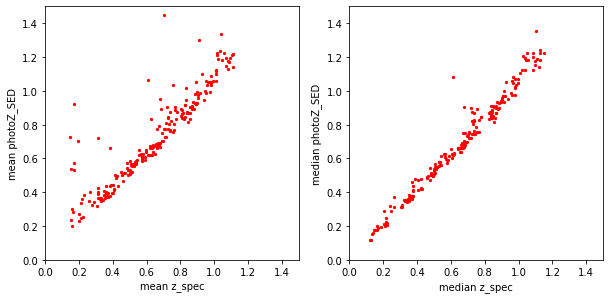

In [88]:
fig, axs=plt.subplots(1,2,figsize=(10,5))
ax=axs[0]
ax.scatter(d['mean_'+specZ],d['mean_'+photoZ],s=5,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('mean '+specZ)
ax.set_ylabel('mean '+photoZ)
ax.set_aspect(1)
ax=axs[1]
ax.scatter(d['median_'+specZ],d['median_'+photoZ],s=5,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('median '+specZ)
ax.set_ylabel('median '+photoZ)
ax.set_aspect(1)

### Checking why some groups have so different mean specZ and photoZ

In [89]:
cellID='cellID_RunSOM' # 'cellID_RunSOM' or 'cellID_RunBigSOM'
photoZ='photoZ_SED' # 'photoZ_SED' or 'photoZ_ML' (only for z<1.2!)
specZ='z_spec' # 'specZ_KB' for Q_f cleaned or 'z_spec' for all specZ, including those with bad Q_f

groups=dataset.groupby(cellID)

In [90]:
d[np.abs(d['mean_'+specZ]-d['mean_'+photoZ])>0.15]

occupation_total  mean_photoZ_SED  median_photoZ_SED  NMAD_photoZ_SED  \
0  23               294         0.720765             0.3700         0.436626   
1  17               724         0.533435             0.1880         0.099334   
   18               277         0.729155             0.1790         0.088956   
   19               262         0.570309             0.1955         0.072647   
   20               188         0.705356             0.2145         0.112678   
   24                75         1.064040             0.9020         0.788743   
2  23               322         1.556373             1.6875         0.424765   
   24               154         1.447955             1.6505         0.432178   
3  4                559         0.383984             0.2920         0.114160   
   22               289         0.951585             0.9000         0.355824   
   23               137         1.300737             1.1840         0.183842   
4  22               227         0.831542             0.7480         0.170499   
   23               113         1.031726             1.0810         0.112678   
6  11               547         0.662980             0.4630         0.169016   
7  0                867         1.096662             1.0540         0.228320   
   24               670         0.539378             0.1600         0.088956   
8  24               386         0.921845             0.1985         0.151225   
9  0                630         1.212435             1.2035         0.168275   
   6                248         0.890831             0.7515         0.196444   
10 0                293         1.333720             1.3520         0.128986   
   3                181         1.052895             1.0010         0.167534   
11 2                323         1.185985             1.1930         0.126021   
   6                265         0.901770             0.8720         0.126021   
   23               223         1.019157             0.9100         0.186808   
12 2                791         1.222373             1.2220         0.133434   
16 5                269         1.223952             1.2230         0.100817   
18 24               410         1.236727             1.2390         0.078578   

       occupation_z_spec  median_z_spec  mean_z_spec  NMAD_z_spec  
0  23              106.0       0.265235     0.314972     0.114976  
1  17               87.0       0.165960     0.169954     0.061469  
   18               42.0       0.146312     0.148238     0.050009  
   19               50.0       0.186650     0.172731     0.049593  
   20               35.0       0.203473     0.195247     0.026578  
   24               25.0       0.676959     0.606090     0.321906  
2  23               27.0       0.828061     0.807406     0.201602  
   24               24.0       0.693400     0.704222     0.143063  
3  4               141.0       0.206947     0.227640     0.120161  
   22               63.0       0.717300     0.678980     0.182217  
   23               28.0       1.045026     0.911555     0.171349  
4  22               50.0       0.669380     0.628201     0.104303  
   23               23.0       0.615100     0.756365     0.146629  
6  11               37.0       0.371000     0.384309     0.060336  
7  0               206.0       0.925554     0.928437     0.105934  
   24              313.0       0.141899     0.154966     0.063651  
8  24               74.0       0.161791     0.169803     0.072824  
9  0               113.0       1.027300     1.015112     0.127462  
   6                34.0       0.680855     0.685718     0.045880  
10 0                36.0       1.105415     1.040974     0.096066  
   3                30.0       0.911102     0.890787     0.107893  
11 2                48.0       1.040562     1.023593     0.092718  
   6                21.0       0.725374     0.723832     0.096398  
   23               21.0       0.847819     0.832895     0.040743  
12 2               113.0       1.084176     1.056389     0.099607 

In [76]:
badCells=d[np.abs(d['mean_'+specZ]-d['mean_'+photoZ])>0.15].index

In [84]:
cellCheck=dataset[dataset[cellID]==badCells[-1]][['z_spec','photoZ_SED']]
print(cellCheck['z_spec'].min(),cellCheck['z_spec'].max())

0.103240505 1.6804
